                                        Consumo de APIs - Resultado en tabla plana

Test:

1.- Consumir la API http://numbersapi.com/1..10

2.- Crear un dataFrame con los 1000 primeros números y descripciones

3.- Grabar la tabla en formato CSV

4.- Crear nueva columna con la longitud de la descripcion

5.- Mostrar en un histograma la distribución de longitudes de descripción


In [1]:
#__IMPORTAMOS TODAS LAS LIBRERIAS NECESARIAS__
import pandas as pd
import csv
import requests
import re
import ast
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [2]:
# 1.- Consumir la API http://numbersapi.com/1..10
APIurl = "http://numbersapi.com/1..10000"
APIresp = requests.get(APIurl)
print(APIresp.ok)
print(APIresp.status_code)
print(APIresp.elapsed)
APIresp.text

True
200
0:00:00.402492


'{\n "1": "1 is the number of Gods in monotheism.",\n "2": "2 is the price in cents per acre the USA bought Alaska from Russia.",\n "3": "3 is cans of Spam consumed every second in the United States.",\n "4": "4 is the number of nucleobase types in DNA and RNA – adenine, guanine, cytosine, thymine (uracil in RNA).",\n "5": "5 is the number of Justices on the Supreme Court of the United States necessary to render a majority decision.",\n "6": "6 is the standard length (year) of a term in office for a United States senator.",\n "7": "7 is the number of main islands of mythological Atlantis.",\n "8": "8 is the number of principles of Yong in Chinese calligraphy.",\n "9": "9 is the number of innings in a regulation, non-tied game of baseball.",\n "10": "10 is the number of spacetime dimensions in some superstring theories.",\n "11": "11 is the miles per hours that the fastest moving land snake, the Black Mamba, can move.",\n "12": "12 is the number of ounces in a troy pound (used for preci

In [3]:
# 2.- Crear un dataFrame con los 1000 primeros números y descripciones
x = ast.literal_eval(APIresp.text)

# 3.- Grabar la tabla en formato CSV
# 4.- Crear nueva columna con la longitud de la descripcion
df = pd.DataFrame([[key, x[key]] for key in x.keys()], columns=['Number', 'Description'])
df

,Number,Description
0,1,1 is the number of Gods in monotheism.
1,2,2 is the price in cents per acre the USA bough...
2,3,3 is cans of Spam consumed every second in the...
3,4,4 is the number of nucleobase types in DNA and...
4,5,5 is the number of Justices on the Supreme Cou...
...,...,...
95,96,96 is the rating of Skyrim on metacritic.com.
96,97,97 is the number of different characters that ...
97,98,98 is the highest jersey number allowed in the...
98,99,"99 is the number of names of Allah, the names ..."


In [4]:
# Rename dataFrame columns
df.rename( columns={"Number" :'numero'}, inplace=True)
df.rename( columns={"Description" :'descripcion'}, inplace=True)

# Convert string to float
print (df.dtypes)
df.numero = df.numero.astype(float)
print (df.dtypes)

df

numero         object
descripcion    object
dtype: object
numero         float64
descripcion     object
dtype: object


,numero,descripcion
0,1.0,1 is the number of Gods in monotheism.
1,2.0,2 is the price in cents per acre the USA bough...
2,3.0,3 is cans of Spam consumed every second in the...
3,4.0,4 is the number of nucleobase types in DNA and...
4,5.0,5 is the number of Justices on the Supreme Cou...
...,...,...
95,96.0,96 is the rating of Skyrim on metacritic.com.
96,97.0,97 is the number of different characters that ...
97,98.0,98 is the highest jersey number allowed in the...
98,99.0,"99 is the number of names of Allah, the names ..."


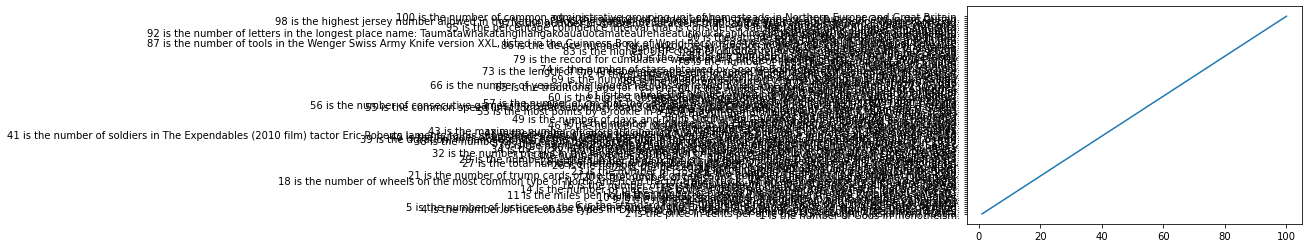

In [5]:
# 5.- Mostrar en un histograma la distribución de longitudes de descripción
plt.plot(df['numero'],df['descripcion'])

In [8]:
# Grabamos el resultado como CSV separado por comas
CSVfilename = "numbers1000.csv"
df.to_csv(CSVfilename, index=False)

In [7]:
print(df)

    numero                                        descripcion
0      1.0             1 is the number of Gods in monotheism.
1      2.0  2 is the price in cents per acre the USA bough...
2      3.0  3 is cans of Spam consumed every second in the...
3      4.0  4 is the number of nucleobase types in DNA and...
4      5.0  5 is the number of Justices on the Supreme Cou...
..     ...                                                ...
95    96.0      96 is the rating of Skyrim on metacritic.com.
96    97.0  97 is the number of different characters that ...
97    98.0  98 is the highest jersey number allowed in the...
98    99.0  99 is the number of names of Allah, the names ...
99   100.0  100 is the number of common administrative gro...

[100 rows x 2 columns]
